In [281]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

from collections import OrderedDict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


import seaborn as sns
import matplotlib.pyplot as plt

"""
We are going to try different model and choose the one with best score
"""

models = OrderedDict([
          ('Knn', KNeighborsClassifier()),
          ('Logistic Regression', LogisticRegression(max_iter=10000)),
          ('Linear SVM', SVC(kernel='linear', probability=True)),
          ('Poly SVM', SVC(kernel='poly',  probability=True)),
          ('RBF SVM', SVC(kernel='rbf',  probability=True)),
          ('Classification Tree', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ('MLP', MLPClassifier(activation='tanh',solver='adam', max_iter=10000,
                                                  learning_rate_init=0.001, random_state=42)),
          ('AdaBoost',AdaBoostClassifier(random_state=42,base_estimator = RandomForestClassifier())),
          ('GBoost',GradientBoostingClassifier())
          
          ])


def training_classification(X,y,model='Logistic Regression',cv=5,score='accuracy_score'):
    # X      : array-like or sparse matrix, shape (n_samples, n_features)
    # y      : array-like of shape (n_samples,)
    # model  : string, classification model ::
    #                - Logistic Regression (default)
    #                - Knn (K - nearest neighbours)
    #                - Linear SVM
    #                - Poly SVM
    #                - RBF SVM
    #                - Classification Tree
    #                - Random Forest
    #                - MLP (Multi Layer Perceptron)
    #                - AdaBoost
    #                - GBoost (Gradient Boosting)
    # cv     : int, cross-validation generator, default=5
    # score  : string, strategy to evaluate the performance of the cross-validated model on the test set ::
    #                - f1_score
    #                - accuracy_score
    #                - precision_score

    
    
    scorers = {'f1_score': make_scorer(f1_score),
              'accuracy_score': make_scorer(accuracy_score),
              'precision_score': make_scorer(precision_score)}
    
    if model=='Knn':
        n_neighbors=np.arange(1,30,1)
        knn=models[model]
        gs = GridSearchCV(knn,param_grid={"n_neighbors": n_neighbors},scoring=scorers,refit=score,cv=cv,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='Gauss Naive Bayes':
        var_smoothing=np.logspace(-10,-3,30)
        gnb=models[model]
        gs = GridSearchCV(gnb,param_grid={"var_smoothing": var_smoothing},scoring=scorers,refit=score,cv=cv,n_jobs=-3,verbose=2)
        if sparse.issparse(X):
            Z=X.toarray()
            gs.fit(Z, y)
        else:
            gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='Multi Naive Bayes':
        alpha=np.logspace(-3,0,20)
        mnb=models[model]
        gs = GridSearchCV(mnb,param_grid={"alpha": alpha},scoring=scorers,refit=score,cv=cv,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='Logistic Regression':
        C  = np.logspace(-3,2,10)
        lr = models[model]
        gs = GridSearchCV(lr,param_grid={"C": C},scoring=scorers,refit=score,cv=cv,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='Linear SVM':
        C=np.logspace(-3,2,10)
        lsvm=models[model]
        gs = GridSearchCV(lsvm,param_grid={"C": C},scoring=scorers,refit=score,cv=cv,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='RBF SVM':
        gamma=np.logspace(-4,1,10)
        C=np.logspace(-3,3,10)
        rsvm=models[model]
        gs = GridSearchCV(rsvm,param_grid={"C": C,"gamma":gamma},scoring=scorers,refit=score,cv=cv,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='Classification Tree':
        max_depth=np.arange(1,50,1)
        ct=models[model]
        gs = GridSearchCV(ct,param_grid={"max_depth": max_depth},scoring=scorers,refit=score,cv=cv,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='Random Forest':
        max_depth=np.arange(1,50,1)
        n_estimators=np.arange(1,50,1)
        rf=models[model]
        gs = GridSearchCV(rf,param_grid={"max_depth": max_depth,"n_estimators": n_estimators},scoring=scorers,refit=score,cv=cv,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='MLP':
        hidden_layer_sizes=[(12,4,2),(6,5,4,3,2),(7,6,5,4,3,2),(8,7,6,5,4,3,2)]
        mlp=models[model]
        gs = GridSearchCV(mlp,param_grid={"hidden_layer_sizes": hidden_layer_sizes},scoring=scorers,refit='accuracy_score',cv=cv,n_jobs=-3,verbose=5)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='AdaBoost':
        param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "n_estimators": np.arange(1,50,1)
             }
        ab=models[model]
        gs = GridSearchCV(ab,param_grid=param_grid,scoring=scorers,refit='accuracy_score',cv=cv,n_jobs=-3,verbose=5)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='GBoost':
        param_grid = {"n_estimators": np.arange(1,100,2)}
        gb=models[model]
        gs = GridSearchCV(gb,param_grid=param_grid,scoring=scorers,refit='accuracy_score',cv=cv,n_jobs=-3,verbose=5)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    

    
def features_identification(X, min_fraction_unique=0.005):
    # X : pd.DataFrame, dataframe

    unique_fraction      = X.apply(lambda col: len(pd.unique(col))/len(col))
    categorical_features = unique_fraction.index[unique_fraction<min_fraction_unique].tolist()
    numerical_features   = unique_fraction.index[unique_fraction>=min_fraction_unique].tolist()

    return categorical_features,numerical_features    
    
    
def preprocessing(X):
    # X : pandas dataframe
    
    categorical_features, numeric_features  = features_identification(X)
    
    numeric_transformer = Pipeline(steps=[('imputer_numeric', SimpleImputer(strategy='mean')),
                                            ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[('imputer_categorical', SimpleImputer(strategy='most_frequent')),
                                                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    return preprocessor


def graph(X,label):
    
    cmap1 = sns.color_palette("crest", as_cmap=True)
    
    categorical_features, numeric_features  = features_identification(X)
    i=0
    for cat in categorical_features:
        shape_color=len(X[cat].unique())
        plt.figure(i)
        sns.countplot(y=label, hue=cat, data=X, palette=sns.color_palette("YlGn", shape_color))
        i+=1
    for num in numeric_features:
        shape_color=len(X[label].unique())
        X.pivot(columns=[label])[num].plot(kind = 'hist', stacked=True,bins=80,figsize=(15,7),color=sns.color_palette("YlGn", shape_color))
        plt.xlabel(num)
        
        
        
        
        


def plot_confusion_matrix(cm,target_names,title='Confusion matrix', cmap=None,normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.show()


In [282]:
X=pd.read_csv("train.csv", encoding="utf8" )
X= X.drop(columns=['Name','PassengerId','Ticket','Cabin'])
test_data=pd.read_csv("test.csv", encoding="utf8" )

In [283]:
len(X['Survived'].unique())

2

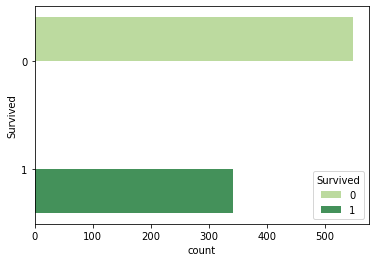

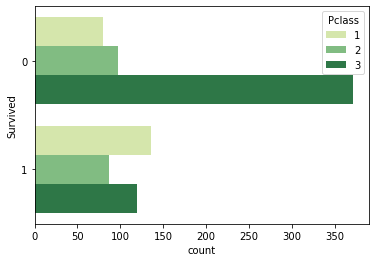

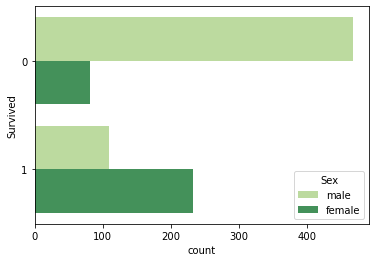

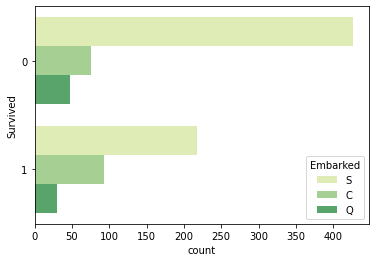

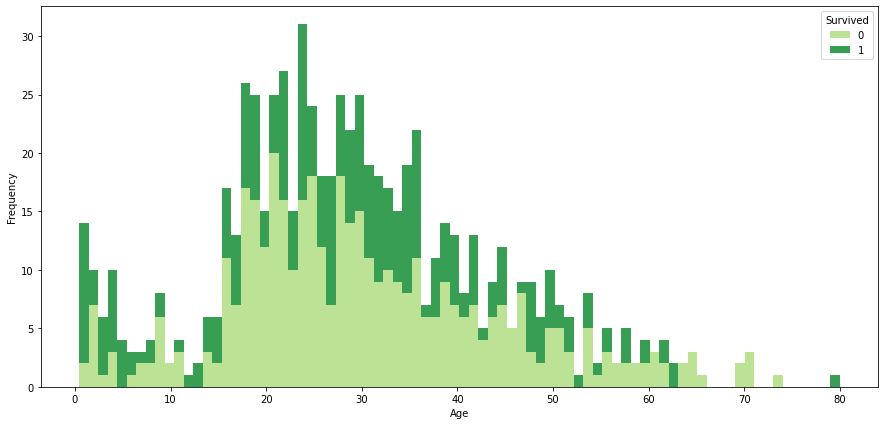

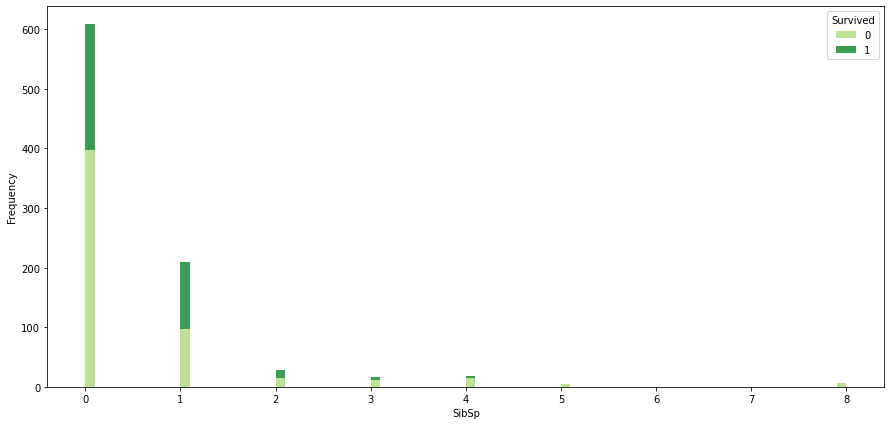

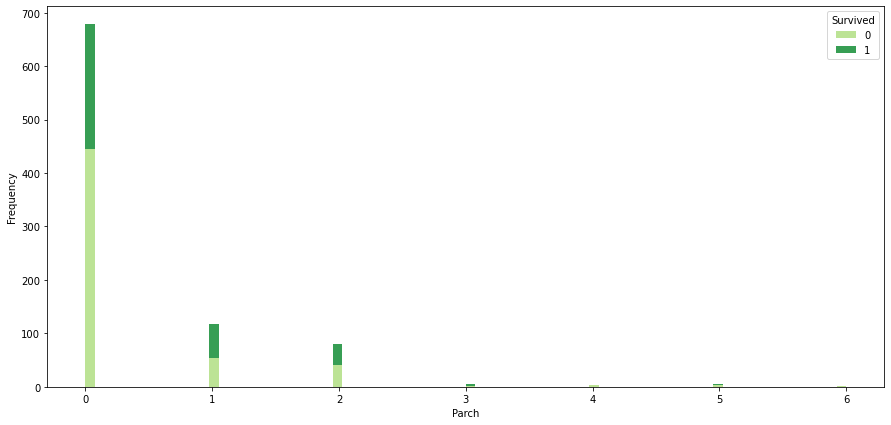

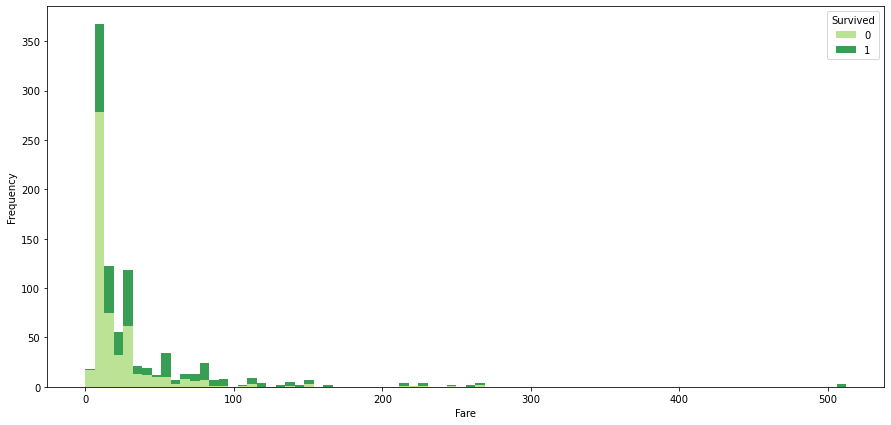

In [284]:
graph(X,'Survived')

In [285]:
y = X['Survived']
X= X.drop(columns=['Survived'])
X_test_f=test_data.drop(columns=['Name','PassengerId','Ticket','Cabin'])


In [286]:
preprocessor=preprocessing(X)

In [287]:
X=preprocessor.fit_transform(X)

In [288]:
X.shape

(891, 12)

In [289]:
X_test_f=preprocessor.transform(X_test_f)

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,stratify=y)

In [291]:
mm,bp,bs=training_classification(X_train,y_train,'GBoost',cv=10)
print ('Best parameter:', bp)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-3)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-3)]: Done 376 tasks      | elapsed:    4.6s


Best parameter: {'n_estimators': 81}


[Parallel(n_jobs=-3)]: Done 500 out of 500 | elapsed:    7.5s finished


In [292]:
target_names = ['Survived','Not Survived']

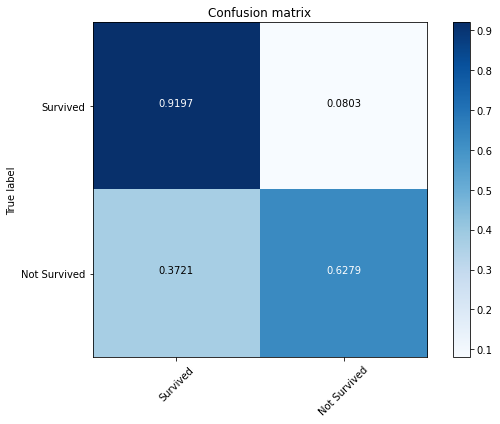

In [293]:
predic = mm.predict(X_test)
confm = confusion_matrix(y_test, predic,normalize='true')
plot_confusion_matrix(confm,target_names)

In [294]:
print(metrics.classification_report(y_test, predic))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       137
           1       0.83      0.63      0.72        86

    accuracy                           0.81       223
   macro avg       0.81      0.77      0.78       223
weighted avg       0.81      0.81      0.80       223



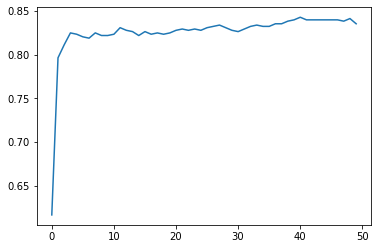

In [295]:
plt.plot(mm.cv_results_['mean_test_accuracy_score'])

In [296]:
best_gb=mm.best_estimator_
best_gb.fit(X,y)
scores=cross_val_score(best_gb, X,y, cv=5,scoring=make_scorer(accuracy_score))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.05)


In [297]:
y_pred = best_gb.predict(X_test_f)

In [298]:
solution = pd.DataFrame({"PassengerId":test_data.PassengerId.unique(), "Survived":y_pred})
solution.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [222]:
solution.to_csv("solution_gb.csv", index=False)

In [223]:
!kaggle competitions submit -c titanic -f solution_gb.csv -m "GradientBoosting and more preprocessing"

100%|████████████████████████████████████████| 2.77k/2.77k [00:03<00:00, 773B/s]
Successfully submitted to Titanic - Machine Learning from Disaster